# Install and ensure we have the libraries needed.
!pip install numpy
!pip install scipy
!pip install sklearn
!pip install matplotlib
!pip install seaborn
!pip install pandas

# Importing the Necessary Libraries

In [1]:
# Import libraries needed.
import numpy as np
import pandas as pd
import scipy.stats as stats
from pandas import DataFrame

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn import preprocessing as p
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestCentroid

# Load Data, Cleaning, and Preparation

In [2]:
#Import the dataset into Pandas DataFrame and display it.
df=pd.read_csv('D212_churn_raw_data.csv')
print(df)

      Unnamed: 0  CaseOrder Customer_id                           Interaction  \
0              1          1     K409198  aa90260b-4141-4a24-8e36-b04ce1f4f77b   
1              2          2     S120509  fb76459f-c047-4a9d-8af9-e0f7d4ac2524   
2              3          3     K191035  344d114c-3736-4be5-98f7-c72c281e2d35   
3              4          4      D90850  abfa2b40-2d43-4994-b15a-989b8c79e311   
4              5          5     K662701  68a861fd-0d20-4e51-a587-8a90407ee574   
...          ...        ...         ...                                   ...   
9995        9996       9996     M324793  45deb5a2-ae04-4518-bf0b-c82db8dbe4a4   
9996        9997       9997     D861732  6e96b921-0c09-4993-bbda-a1ac6411061a   
9997        9998       9998     I243405  e8307ddf-9a01-4fff-bc59-4742e03fd24f   
9998        9999       9999     I641617  3775ccfc-0052-4107-81ae-9657f81ecdf3   
9999       10000      10000      T38070  9de5fb6e-bd33-4995-aec8-f01d0172a499   

              City State   

In [3]:
#List total number of entries in dataset (RowsxColumn).
print(df.shape)

(10000, 52)


In [4]:
#Display the datatype for each column.
print(df.dtypes)

Unnamed: 0                int64
CaseOrder                 int64
Customer_id              object
Interaction              object
City                     object
State                    object
County                   object
Zip                       int64
Lat                     float64
Lng                     float64
Population                int64
Area                     object
Timezone                 object
Job                      object
Children                float64
Age                     float64
Education                object
Employment               object
Income                  float64
Marital                  object
Gender                   object
Churn                    object
Outage_sec_perweek      float64
Email                     int64
Contacts                  int64
Yearly_equip_failure      int64
Techie                   object
Contract                 object
Port_modem               object
Tablet                   object
InternetService          object
Phone   

In [5]:
#Perform checks to see if null values exists.
print(df.isna().sum())

Unnamed: 0                 0
CaseOrder                  0
Customer_id                0
Interaction                0
City                       0
State                      0
County                     0
Zip                        0
Lat                        0
Lng                        0
Population                 0
Area                       0
Timezone                   0
Job                        0
Children                2495
Age                     2475
Education                  0
Employment                 0
Income                  2490
Marital                    0
Gender                     0
Churn                      0
Outage_sec_perweek         0
Email                      0
Contacts                   0
Yearly_equip_failure       0
Techie                  2477
Contract                   0
Port_modem                 0
Tablet                     0
InternetService            0
Phone                   1026
Multiple                   0
OnlineSecurity             0
OnlineBackup  

In [6]:
#Look at the basic statistics of the dataset.
df.describe()

,Unnamed: 0,CaseOrder,Zip,Lat,Lng,Population,Children,Age,Income,Outage_sec_perweek,...,MonthlyCharge,Bandwidth_GB_Year,item1,item2,item3,item4,item5,item6,item7,item8
count,10000.00000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,7505.000000,7525.000000,7510.000000,10000.000000,...,10000.000000,8979.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,5000.50000,49153.319600,38.757567,-90.782536,9756.562400,2.095936,53.275748,39936.762226,11.452955,...,174.076305,3398.842752,3.490800,3.505100,3.487000,3.497500,3.492900,3.497300,3.509500,3.495600
std,2886.89568,2886.89568,27532.196108,5.437389,15.156142,14432.698671,2.154758,20.753928,28358.469482,7.025921,...,43.335473,2187.396807,1.037797,1.034641,1.027977,1.025816,1.024819,1.033586,1.028502,1.028633
min,1.00000,1.00000,601.000000,17.966120,-171.688150,0.000000,0.000000,18.000000,740.660000,-1.348571,...,77.505230,155.506715,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2500.75000,2500.75000,26292.500000,35.341828,-97.082812,738.000000,0.000000,35.000000,19285.522500,8.054362,...,141.071078,1234.110529,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,5000.50000,5000.50000,48869.500000,39.395800,-87.918800,2910.500000,1.000000,53.000000,33186.785000,10.202896,...,169.915400,3382.424000,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000
75%,7500.25000,7500.25000,71866.500000,42.106908,-80.088745,13168.000000,3.000000,71.000000,53472.395000,12.487644,...,203.777441,5587.096500,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,10000.00000,10000.00000,99929.000000,70.640660,-65.667850,111850.000000,10.000000,89.000000,258900.700000,47.049280,...,315.878600,7158.982000,7.000000,7.000000,8.000000,7.000000,7.000000,8.000000,7.000000,8.000000


In [7]:
#Looking at the dataset's basic statistic, we can see that Unnamed Column and CaseOrder are copies of one another.
#The dictionary also states that its to preserve the original order of the raw data so we should be safe to remove it.

df=df.drop(df.columns[0], axis = 1);

In [8]:
#We then need to rename the columns named item1 item2, etc.
df=df.rename({'item1' : 'Timely_Response',
                    'item2' : 'Timely_Fixes',
                    'item3' : 'Timely_Replacement',
                    'item4' : 'Reliability',
                    'item5' : 'Options',
                    'item6' : 'Respectable_Response',
                    'item7' : 'Courteous_Exchange',
                    'item8' : 'Evidence_of_active_listening'}, axis='columns')

In [9]:
#Next we look at the unique string value from categorical columns that can be potentially recoded.
#A potential variable is any variable that is: easily understood, easily describable and can be methodologically recoded.
df['Churn'].unique()

array(['No', 'Yes'], dtype=object)

In [10]:
df['Area'].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [11]:
df['Marital'].unique()

array(['Widowed', 'Married', 'Separated', 'Never Married', 'Divorced'],
      dtype=object)

In [12]:
df['Education'].unique()

array(["Master's Degree", 'Regular High School Diploma',
       'Doctorate Degree', 'No Schooling Completed', "Associate's Degree",
       "Bachelor's Degree", 'Some College, Less than 1 Year',
       'GED or Alternative Credential',
       'Some College, 1 or More Years, No Degree',
       '9th Grade to 12th Grade, No Diploma',
       'Nursery School to 8th Grade', 'Professional School Degree'],
      dtype=object)

In [13]:
df['Employment'].unique()

array(['Part Time', 'Retired', 'Student', 'Full Time', 'Unemployed'],
      dtype=object)

In [14]:
df['Gender'].unique()

array(['Male', 'Female', 'Prefer not to answer'], dtype=object)

In [15]:
df['Techie'].unique()

array(['No', 'Yes', nan], dtype=object)

In [16]:
df['Contract'].unique()

array(['One year', 'Month-to-month', 'Two Year'], dtype=object)

In [17]:
df['Port_modem'].unique()

array(['Yes', 'No'], dtype=object)

In [18]:
df['Tablet'].unique()

array(['Yes', 'No'], dtype=object)

In [19]:
df['InternetService'].unique()

array(['Fiber Optic', 'DSL', 'None'], dtype=object)

In [20]:
df['Phone'].unique()

array(['Yes', 'No', nan], dtype=object)

In [21]:
df['Multiple'].unique()

array(['No', 'Yes'], dtype=object)

In [22]:
df['OnlineSecurity'].unique()

array(['Yes', 'No'], dtype=object)

In [23]:
df['OnlineBackup'].unique()

array(['Yes', 'No'], dtype=object)

In [24]:
df['DeviceProtection'].unique()

array(['No', 'Yes'], dtype=object)

In [25]:
df['TechSupport'].unique()

array(['No', 'Yes', nan], dtype=object)

In [26]:
df['StreamingTV'].unique()

array(['No', 'Yes'], dtype=object)

In [27]:
df['PaperlessBilling'].unique()

array(['Yes', 'No'], dtype=object)

In [28]:
df['PaymentMethod'].unique()

array(['Credit Card (automatic)', 'Bank Transfer(automatic)',
       'Mailed Check', 'Electronic Check'], dtype=object)

In [29]:
df['MonthlyCharge'].unique()

array([171.4497621, 242.9480155, 159.4403984, ..., 168.2209   ,
       252.6286   , 218.371    ])

In [30]:
#Once we know the unique values for the categorical columns we want to change,
#we'll perform the necessary codes on them. First we'll change all binary values and the 'InternetService'
#column to 1 or 0. 
#We'll also fill NaN value for column 'TechSupport','Techie', 'Phone' with 0 as we will assume that these
#value were left empty as they did not apply to the customer.

df=df.replace(['Yes','Fiber Optic', 'DSL'],'1');
df=df.replace(['No', 'None'],'0');
df[['TechSupport', 'Techie', 'Phone']] = df[['TechSupport', 'Techie', 'Phone']].fillna(value=0);
df=df.astype({'Churn': 'float64', 
              'Port_modem': 'float64', 
              'Tablet': 'float64', 
              'InternetService': 'float64', 
              'Phone': 'float64',
              'Multiple': 'float64',
              'OnlineSecurity': 'float64',
              'OnlineBackup': 'float64',
              'DeviceProtection': 'float64',
              'TechSupport': 'float64',
              'StreamingTV': 'float64',
              'PaperlessBilling': 'float64',
              'StreamingMovies': 'float64',
              'Techie': 'float64'})


In [31]:
#Recode Education with 'Doctorate Degree' from 11 to 'No Schooling Completed' at 0. Also convert datatype to float.
df=df.replace(['Doctorate Degree'] ,'11');
df=df.replace(["Master's Degree"],'10');
df=df.replace(["Bachelor's Degree"],'9');
df=df.replace(["Associate's Degree"] ,'8');
df=df.replace(['Professional School Degree'],'7');
df=df.replace(['Some College, 1 or More Years, No Degree'],'6');
df=df.replace(['Some College, Less than 1 Year'] ,'5');
df=df.replace(['Regular High School Diploma'],'4');
df=df.replace(['GED or Alternative Credential'],'3');
df=df.replace(['9th Grade to 12th Grade, No Diploma'] ,'2');
df=df.replace(['Nursery School to 8th Grade'],'1');
df=df.replace(['No Schooling Completed'],'0');
df=df.astype({'Education': 'float64'})
print(df['Education'])

0       10.0
1        4.0
2        4.0
3       11.0
4       10.0
        ... 
9995     5.0
9996     4.0
9997     1.0
9998     9.0
9999     3.0
Name: Education, Length: 10000, dtype: float64


In [32]:
#Recode Marital column 'Married' from 4 to 'Never Married' at 0. Also convert datatype to float.

df=df.replace(['Married'] ,'4');
df=df.replace(['Separated'] ,'3');
df=df.replace(['Divorced'] ,'2');
df=df.replace(['Widowed'],'1');
df=df.replace(['Never Married'],'0');
df=df.astype({'Marital': 'float64'})
print(df['Marital'])

0       1.0
1       4.0
2       1.0
3       4.0
4       3.0
       ... 
9995    4.0
9996    2.0
9997    0.0
9998    3.0
9999    0.0
Name: Marital, Length: 10000, dtype: float64


In [33]:
#Recode PaymentMethod with 'Bank Transfer(automatic)'=3, Credit Card'=2, 'Electronic Check'=1, 'Mailed Check'=0.
#Also convert datatype to float.

df=df.replace(["Bank Transfer(automatic)"] ,'3');
df=df.replace(["Credit Card (automatic)"],'2');
df=df.replace(['Electronic Check'],'1');
df=df.replace(['Mailed Check'],'0');
df=df.astype({'PaymentMethod': 'float64'})
print(df['PaymentMethod'])

0       2.0
1       3.0
2       2.0
3       0.0
4       0.0
       ... 
9995    1.0
9996    1.0
9997    3.0
9998    2.0
9999    1.0
Name: PaymentMethod, Length: 10000, dtype: float64


In [34]:
#Recode Gender with 'Male'=2, 'Female'=1, 'Prefer Not to Answer'=0. Also convert datatype to float.
df=df.replace(['Male'] ,'2');
df=df.replace(['Female'],'1');
df=df.replace(['Prefer not to answer'],'0');
df=df.astype({'Gender': 'float64'})
print(df['Gender'])

0       2.0
1       1.0
2       1.0
3       2.0
4       2.0
       ... 
9995    2.0
9996    2.0
9997    1.0
9998    2.0
9999    2.0
Name: Gender, Length: 10000, dtype: float64


In [35]:
#Now that we've recoded a majority of the relevant variable for our analysis, we need to decide what values
#to use for imputation.
print(df[['Children', 'Age', 'Income', 'Tenure', 'Bandwidth_GB_Year']].describe())

          Children          Age         Income       Tenure  Bandwidth_GB_Year
count  7505.000000  7525.000000    7510.000000  9069.000000        8979.000000
mean      2.095936    53.275748   39936.762226    34.498858        3398.842752
std       2.154758    20.753928   28358.469482    26.438904        2187.396807
min       0.000000    18.000000     740.660000     1.000259         155.506715
25%       0.000000    35.000000   19285.522500     7.890442        1234.110529
50%       1.000000    53.000000   33186.785000    36.196030        3382.424000
75%       3.000000    71.000000   53472.395000    61.426670        5587.096500
max      10.000000    89.000000  258900.700000    71.999280        7158.982000


In [36]:
#Impute missing values for 'Children', 'Age', 'Income', 'Tenure', 'Bandwidth_GB_Year' with median or mean values.
#Print to see if there is still in any null values.
df['Children'] = df['Children'].fillna(df['Children'].median())
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Income'] = df['Income'].fillna(df['Income'].mean())
df['Tenure'] = df['Tenure'].fillna(df['Tenure'].mean())
df['Bandwidth_GB_Year'] = df['Bandwidth_GB_Year'].fillna(df['Bandwidth_GB_Year'].mean())

print(df.isna().sum())

CaseOrder                       0
Customer_id                     0
Interaction                     0
City                            0
State                           0
County                          0
Zip                             0
Lat                             0
Lng                             0
Population                      0
Area                            0
Timezone                        0
Job                             0
Children                        0
Age                             0
Education                       0
Employment                      0
Income                          0
Marital                         0
Gender                          0
Churn                           0
Outage_sec_perweek              0
Email                           0
Contacts                        0
Yearly_equip_failure            0
Techie                          0
Contract                        0
Port_modem                      0
Tablet                          0
InternetServic

In [37]:
#Find duplicate rows.
print(df.duplicated())

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool


In [38]:
#Looking at the dataset we can see that the 'Zip' column has alot of incomplete values. 
#Using this code, we can see how many rows have incomplete data.
df['Zip'] = df['Zip'].apply(str)
num_row=df['Zip'].str.len()
print(len(num_row[(num_row<5)]))

773


In [39]:
#Drop the Zip Column due to a large number of incomplete data.
df = df.drop('Zip',axis=1)
print(df)

      CaseOrder Customer_id                           Interaction  \
0             1     K409198  aa90260b-4141-4a24-8e36-b04ce1f4f77b   
1             2     S120509  fb76459f-c047-4a9d-8af9-e0f7d4ac2524   
2             3     K191035  344d114c-3736-4be5-98f7-c72c281e2d35   
3             4      D90850  abfa2b40-2d43-4994-b15a-989b8c79e311   
4             5     K662701  68a861fd-0d20-4e51-a587-8a90407ee574   
...         ...         ...                                   ...   
9995       9996     M324793  45deb5a2-ae04-4518-bf0b-c82db8dbe4a4   
9996       9997     D861732  6e96b921-0c09-4993-bbda-a1ac6411061a   
9997       9998     I243405  e8307ddf-9a01-4fff-bc59-4742e03fd24f   
9998       9999     I641617  3775ccfc-0052-4107-81ae-9657f81ecdf3   
9999      10000      T38070  9de5fb6e-bd33-4995-aec8-f01d0172a499   

              City State                 County       Lat        Lng  \
0      Point Baker    AK  Prince of Wales-Hyder  56.25100 -133.37571   
1      West Branch    MI   

In [40]:
#Add up all the rows in each Service Column into a new Column called 'Sum_services'.

df['Sum_services'] = df['InternetService'] + df['Phone'] + df['Multiple'] + \
df['OnlineSecurity'] +df['OnlineBackup'] + df['DeviceProtection'] +df['TechSupport'] +\
df['StreamingTV'] + df['StreamingMovies']

print(df['Sum_services'])

0       5.0
1       6.0
2       4.0
3       4.0
4       3.0
       ... 
9995    4.0
9996    6.0
9997    5.0
9998    5.0
9999    7.0
Name: Sum_services, Length: 10000, dtype: float64


In [41]:
#Look at central tendency values of new column.
df['Sum_services'].describe()

count    10000.000000
mean         4.626800
std          1.423982
min          0.000000
25%          4.000000
50%          5.000000
75%          6.000000
max          9.000000
Name: Sum_services, dtype: float64

In [42]:
#Create Z-Score of 'Sum_services' and put it into 'Z_ScoreServices' column and new variable df_z. Print Z-Score higher than 3.
df['Z_ScoreServices']=stats.zscore(df['Sum_services'])
df_z=df['Z_ScoreServices']
print(np.where(df_z > 3))

(array([  75,  798, 1430, 2275, 3425, 3770, 4055, 4489, 4676, 4927, 5257,
       5592, 6507, 6878, 7529, 7696, 9734], dtype=int64),)


In [43]:
#Confirm that column 'Z_ScoreServices' in position 75 is over 3.
print (df_z.iloc[75])

3.0712599571175825


In [44]:
#Declare new variable df_cln to remove rows with Z-Score higher 3 and lower than -3. Print to ensure removal.
df_cln = df
df_cln = df_cln[(df_z < 3) & (df_z > -3)]

print (df_cln['Z_ScoreServices'].iloc[75])


-0.4401961358093162


In [45]:
#Create new dataframe and drop all unused columns for our analysis
dflog=df.drop(['CaseOrder','Customer_id','Interaction','City','State',
               'County','Lat','Lng','Population','Timezone','Job',
               'Education','Marital','InternetService','Phone','Multiple','OnlineSecurity',
               'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies',
               'Email','Contacts', 'Gender','PaperlessBilling','PaymentMethod',
               'Techie','Port_modem','Tablet', 'Tenure','Z_ScoreServices','Area','Employment','Contract'], axis = 1)

dflog

,Children,Age,Income,Churn,Outage_sec_perweek,Yearly_equip_failure,MonthlyCharge,Bandwidth_GB_Year,Timely_Response,Timely_Fixes,Timely_Replacement,Reliability,Options,Respectable_Response,Courteous_Exchange,Evidence_of_active_listening,Sum_services
0,1.0,68.0,28561.990000,0.0,6.972566,1,171.449762,904.536110,5,5,5,3,4,4,3,4,5.0
1,1.0,27.0,21704.770000,1.0,12.014541,1,242.948015,800.982766,3,4,3,3,4,3,4,4,6.0
2,4.0,50.0,39936.762226,0.0,10.245616,1,159.440398,2054.706961,4,4,2,4,4,3,3,3,4.0
3,1.0,48.0,18925.230000,0.0,15.206193,0,120.249493,2164.579412,4,4,4,2,5,4,3,3,4.0
4,0.0,83.0,40074.190000,1.0,8.960316,1,150.761216,271.493436,4,4,4,3,4,4,4,5,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,3.0,53.0,55723.740000,0.0,9.265392,0,159.828800,6511.253000,3,2,3,3,4,3,2,3,4.0
9996,4.0,48.0,39936.762226,0.0,8.115849,0,208.856400,5695.952000,4,5,5,4,4,5,2,5,6.0
9997,1.0,53.0,39936.762226,0.0,4.837696,0,168.220900,4159.306000,4,4,4,4,4,4,4,5,5.0
9998,1.0,39.0,16667.580000,0.0,12.076460,0,252.628600,6468.457000,4,4,6,4,3,3,5,4,5.0


In [46]:
#Reinitialize df_cln
df_cln = dflog

# Exploratory Data Analysis

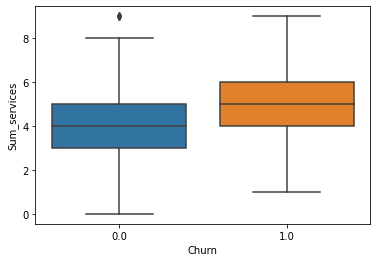

In [47]:
#Perform BoxPlot to find Outliers.
g_boxplot = sns.boxplot(x='Churn', y='Sum_services', data=df_cln)

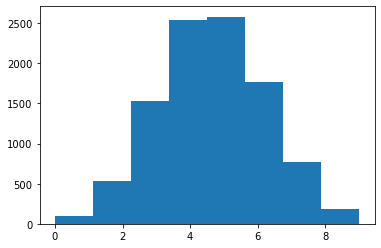

In [48]:
#Perform Histogram on 'Sum_services'.
h_gram=plt.hist(df_cln['Sum_services'], bins=8)

array([[<AxesSubplot:title={'center':'Sum_services'}>,
        <AxesSubplot:title={'center':'Income'}>,
        <AxesSubplot:title={'center':'Timely_Fixes'}>],
       [<AxesSubplot:title={'center':'Timely_Replacement'}>,
        <AxesSubplot:title={'center':'Reliability'}>,
        <AxesSubplot:title={'center':'Options'}>],
       [<AxesSubplot:title={'center':'Respectable_Response'}>,
        <AxesSubplot:title={'center':'Courteous_Exchange'}>,
        <AxesSubplot:title={'center':'Evidence_of_active_listening'}>]],
      dtype=object)

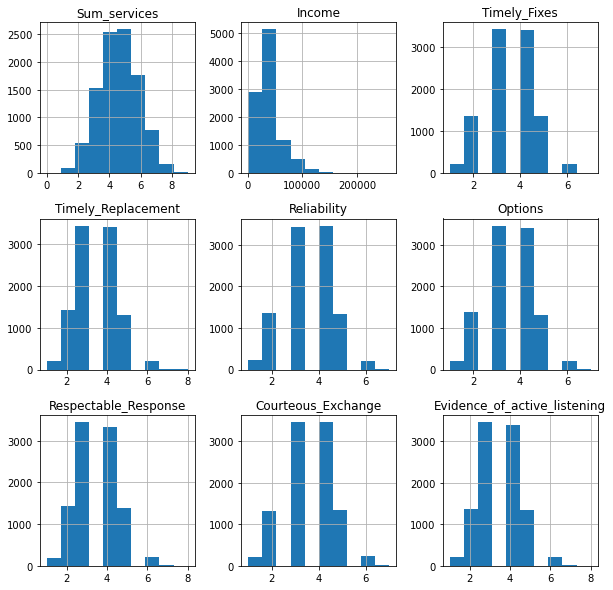

In [49]:
#Perform Univariate Analysis histogram on all predictor variables.
df_cln[['Sum_services','Income', 'Timely_Fixes','Timely_Replacement','Reliability','Options',
        'Respectable_Response','Courteous_Exchange','Evidence_of_active_listening']].hist(figsize=(10,10),bins=10)

<AxesSubplot:xlabel='Sum_services'>

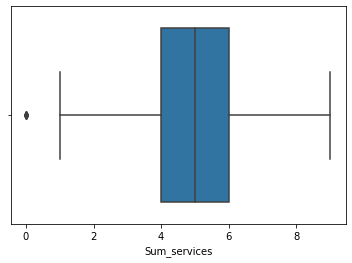

In [50]:
#Create Boxplot for 'Sum_services'.
sns.boxplot(x='Sum_services', data=df_cln)

<AxesSubplot:xlabel='Income'>

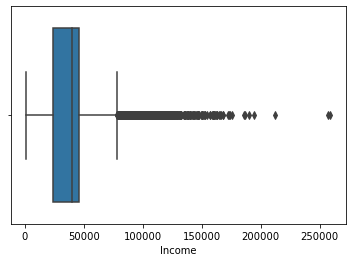

In [51]:
#Create Boxplot for 'Income'.
sns.boxplot(x='Income', data=df_cln)

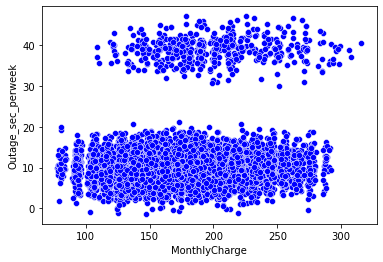

In [52]:
#Perform Scatterplot on Various Predictor Variable
sns.scatterplot(x=df_cln['MonthlyCharge'], y=df_cln['Outage_sec_perweek'], color='blue')
plt.show();

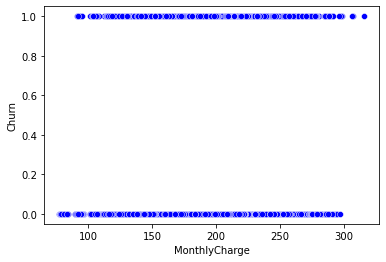

In [53]:
#Scatterplot for potentially correlated variable
sns.scatterplot(x=df_cln['MonthlyCharge'], y=df_cln['Churn'], color='blue')
plt.show();

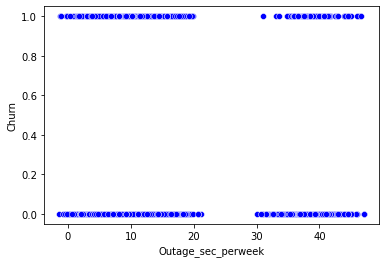

In [54]:
#Scatterplot for potentially correlated variable
sns.scatterplot(x=df_cln['Outage_sec_perweek'], y=df_cln['Churn'], color='blue')
plt.show();

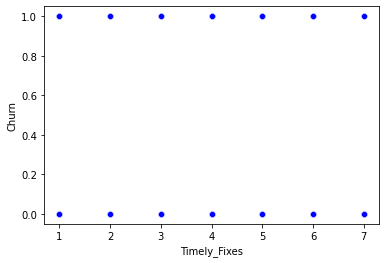

In [55]:
#Scatterplot for potentially correlated variable
sns.scatterplot(x=df_cln['Timely_Fixes'], y=df_cln['Churn'], color='blue')
plt.show()

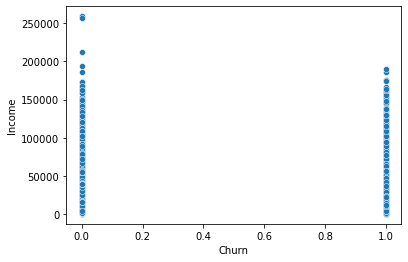

In [56]:
#Create Bivariate Analysis of Churn and predictor variables.
sns.scatterplot(x='Churn',y='Income', data=df_cln)
plt.show()

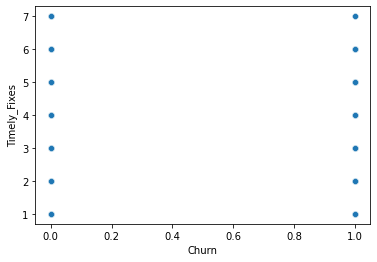

In [57]:
#Create Bivariate Analysis of Churn and predictor variables.
sns.scatterplot(x='Churn',y='Timely_Fixes', data=df_cln)
plt.show()

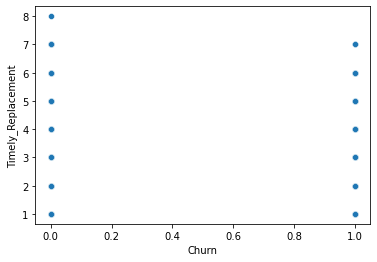

In [58]:
#Create Bivariate Analysis of Churn and predictor variables.
sns.scatterplot(x='Churn',y='Timely_Replacement', data=df_cln)
plt.show()

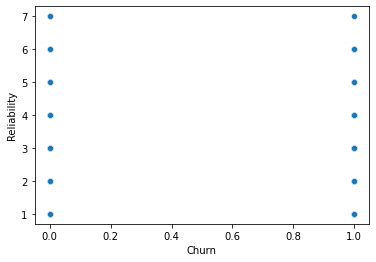

In [59]:
#Create Bivariate Analysis of Churn and predictor variables.
sns.scatterplot(x='Churn',y='Reliability', data=df_cln)
plt.show()

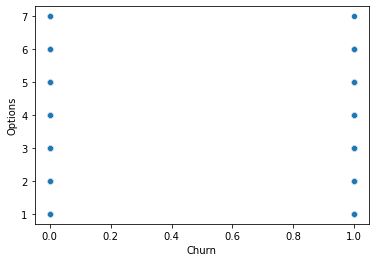

In [60]:
#Create Bivariate Analysis of Churn and predictor variables.
sns.scatterplot(x='Churn',y='Options', data=df_cln)
plt.show()

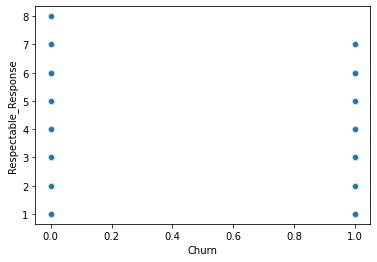

In [61]:
#Create Bivariate Analysis of Churn and predictor variables.
sns.scatterplot(x='Churn',y='Respectable_Response', data=df_cln)
plt.show()

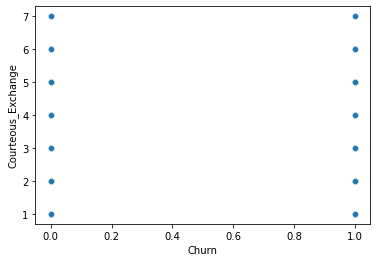

In [62]:
#Create Bivariate Analysis of Churn and predictor variables.
sns.scatterplot(x='Churn',y='Courteous_Exchange', data=df_cln)
plt.show()

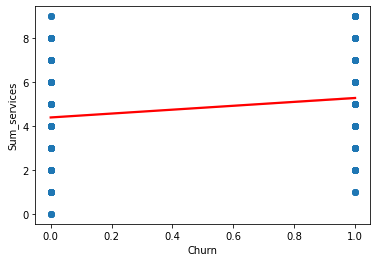

In [63]:
#Create Bivariate Analysis of Churn and predictor variables.
sns.regplot(x='Churn',y='Sum_services', data=df_cln, line_kws={"color": "red"})
plt.show()

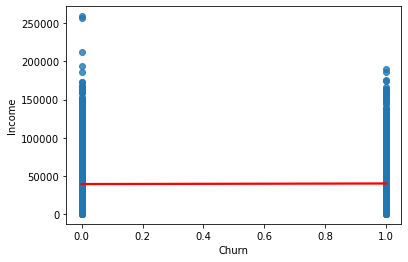

In [64]:
#Create Bivariate Analysis of Churn and predictor variables.
sns.regplot(x='Churn',y='Income', data=df_cln, line_kws={"color": "red"})
plt.show()

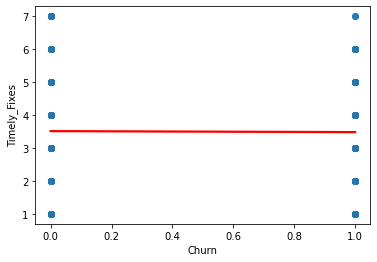

In [65]:
#Create Bivariate Analysis of Churn and predictor variables.
sns.regplot(x='Churn',y='Timely_Fixes', data=df_cln, line_kws={"color": "red"})
plt.show()

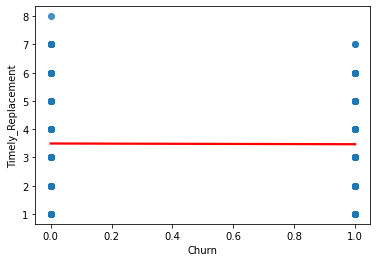

In [66]:
#Create Bivariate Analysis of Churn and predictor variables.
sns.regplot(x='Churn',y='Timely_Replacement', data=df_cln, line_kws={"color": "red"})
plt.show()

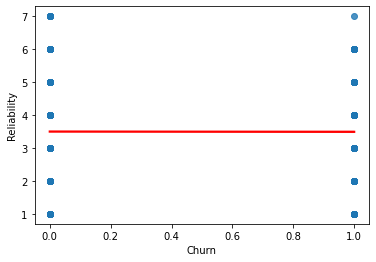

In [67]:
#Create Bivariate Analysis of Churn and predictor variables.
sns.regplot(x='Churn',y='Reliability', data=df_cln, line_kws={"color": "red"})
plt.show()

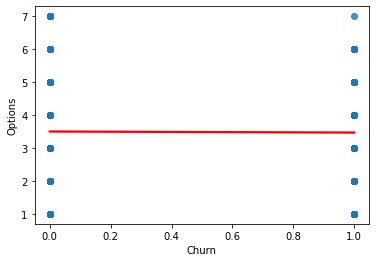

In [68]:
#Create Bivariate Analysis of Churn and predictor variables.
sns.regplot(x='Churn',y='Options', data=df_cln, line_kws={"color": "red"})
plt.show()

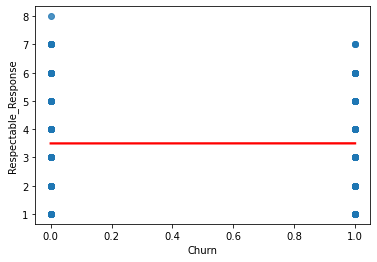

In [69]:
#Create Bivariate Analysis of Churn and predictor variables.
sns.regplot(x='Churn',y='Respectable_Response', data=df_cln, line_kws={"color": "red"})
plt.show()

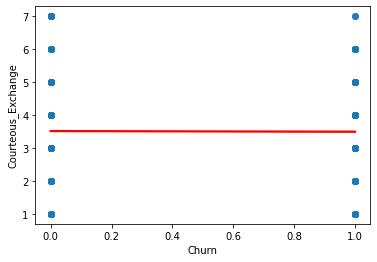

In [70]:
#Create Bivariate Analysis of Churn and predictor variables.
sns.regplot(x='Churn',y='Courteous_Exchange', data=df_cln, line_kws={"color": "red"})
plt.show()

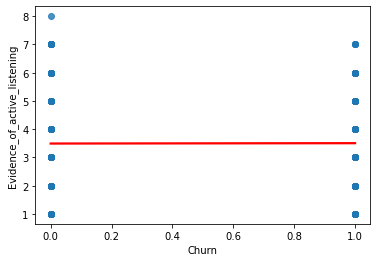

In [71]:
#Create Bivariate Analysis of Churn and predictor variables.
sns.regplot(x='Churn',y='Evidence_of_active_listening', data=df_cln, line_kws={"color": "red"})
plt.show()

# Export the Cleaned Dataset

In [72]:
#Export cleaned dataset to a new CSV file
df_cln.to_csv('D212_Cleaned_Dataset_T1.csv')

# Data Preprocessing

In [73]:
#Creat copy of df_cln
df_model=df_cln.copy()
df_model = df_model.drop(['Churn'], axis = 1)

In [74]:
#Look at the new dataframe
print (df_model)

      Children   Age        Income  Outage_sec_perweek  Yearly_equip_failure  \
0          1.0  68.0  28561.990000            6.972566                     1   
1          1.0  27.0  21704.770000           12.014541                     1   
2          4.0  50.0  39936.762226           10.245616                     1   
3          1.0  48.0  18925.230000           15.206193                     0   
4          0.0  83.0  40074.190000            8.960316                     1   
...        ...   ...           ...                 ...                   ...   
9995       3.0  53.0  55723.740000            9.265392                     0   
9996       4.0  48.0  39936.762226            8.115849                     0   
9997       1.0  53.0  39936.762226            4.837696                     0   
9998       1.0  39.0  16667.580000           12.076460                     0   
9999       1.0  28.0  39936.762226           12.641760                     0   

      MonthlyCharge  Bandwidth_GB_Year 

In [75]:
#Standardize the data.
df_scaler = p.StandardScaler().fit_transform(df_model)
df_scaler = pd.DataFrame(df_scaler)
df_scaler.columns = ['Children_K','Age_K','Income_K','Outage_K','Yearly_e_fail_K','MonthlyCharge_K','Band_GB_Year_K','Time_Resp_K',
                  'Time_Fix_K','Time_replace_K','Reliability_K','Options_K','Respect_Response_K','Court_Exchange_K',
                 'Evidence_Active_Listen_K','Sum_service_K']
df_final = pd.concat([df_model,df_scaler], axis = 1)
df_final

,Children,Age,Income,Outage_sec_perweek,Yearly_equip_failure,MonthlyCharge,Bandwidth_GB_Year,Timely_Response,Timely_Fixes,Timely_Replacement,...,Band_GB_Year_K,Time_Resp_K,Time_Fix_K,Time_replace_K,Reliability_K,Options_K,Respect_Response_K,Court_Exchange_K,Evidence_Active_Listen_K,Sum_service_K
0,1.0,68.0,28561.990000,6.972566,1,171.449762,904.536110,5,5,5,...,-1.203462,1.454307,1.444922,1.471896,-0.485004,0.494844,0.486389,-0.495406,0.490384,0.262095
1,1.0,27.0,21704.770000,12.014541,1,242.948015,800.982766,3,4,3,...,-1.253425,-0.472948,0.478354,-0.473770,-0.485004,0.494844,-0.481165,0.476931,0.490384,0.964386
2,4.0,50.0,39936.762226,10.245616,1,159.440398,2054.706961,4,4,2,...,-0.648524,0.490679,0.478354,-1.446603,0.489878,0.494844,-0.481165,-0.495406,-0.481828,-0.440196
3,1.0,48.0,18925.230000,15.206193,0,120.249493,2164.579412,4,4,4,...,-0.595512,0.490679,0.478354,0.499063,-1.459886,1.470674,0.486389,-0.495406,-0.481828,-0.440196
4,0.0,83.0,40074.190000,8.960316,1,150.761216,271.493436,4,4,4,...,-1.508895,0.490679,0.478354,0.499063,-0.485004,0.494844,0.486389,0.476931,1.462596,-1.142487
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,3.0,53.0,55723.740000,9.265392,0,159.828800,6511.253000,3,2,3,...,1.501687,-0.472948,-1.454781,-0.473770,-0.485004,0.494844,-0.481165,-1.467742,-0.481828,-0.440196
9996,4.0,48.0,39936.762226,8.115849,0,208.856400,5695.952000,4,5,5,...,1.108318,0.490679,1.444922,1.471896,0.489878,0.494844,1.453943,-1.467742,1.462596,0.964386
9997,1.0,53.0,39936.762226,4.837696,0,168.220900,4159.306000,4,4,4,...,0.366911,0.490679,0.478354,0.499063,0.489878,0.494844,0.486389,0.476931,1.462596,0.262095
9998,1.0,39.0,16667.580000,12.076460,0,252.628600,6468.457000,4,4,6,...,1.481039,0.490679,0.478354,2.444730,0.489878,-0.480987,-0.481165,1.449268,0.490384,0.262095


In [76]:
print(df_final.isna().sum())

Children                        0
Age                             0
Income                          0
Outage_sec_perweek              0
Yearly_equip_failure            0
MonthlyCharge                   0
Bandwidth_GB_Year               0
Timely_Response                 0
Timely_Fixes                    0
Timely_Replacement              0
Reliability                     0
Options                         0
Respectable_Response            0
Courteous_Exchange              0
Evidence_of_active_listening    0
Sum_services                    0
Children_K                      0
Age_K                           0
Income_K                        0
Outage_K                        0
Yearly_e_fail_K                 0
MonthlyCharge_K                 0
Band_GB_Year_K                  0
Time_Resp_K                     0
Time_Fix_K                      0
Time_replace_K                  0
Reliability_K                   0
Options_K                       0
Respect_Response_K              0
Court_Exchange

# Perform Kmeans Clustering Analysis

In [77]:
#Function for Performing Elbow Method
def optimise_k_means(data, max_k):
    means = []
    inertias = []
    
    for k in range(1, max_k):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(data)
        
        means.append(k)
        inertias.append(kmeans.inertia_)
        
    #Generate the elbow plot
    fig = plt.subplots(figsize = (10,5))
    plt.plot(means,inertias, 'o-')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.grid(True)
    plt.show()

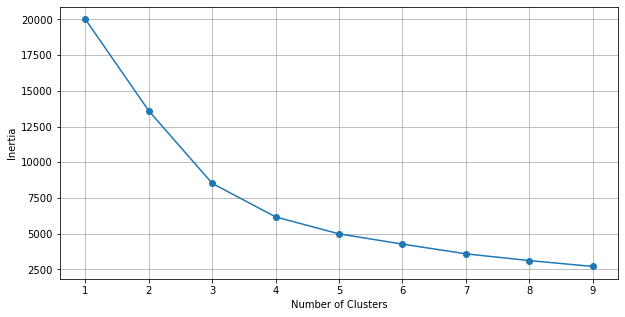

In [78]:
df_KM_1 = df_final.copy() 
optimise_k_means(df_KM_1[['Age_K','Income_K']], 10)

In [79]:
df_final

,Children,Age,Income,Outage_sec_perweek,Yearly_equip_failure,MonthlyCharge,Bandwidth_GB_Year,Timely_Response,Timely_Fixes,Timely_Replacement,...,Band_GB_Year_K,Time_Resp_K,Time_Fix_K,Time_replace_K,Reliability_K,Options_K,Respect_Response_K,Court_Exchange_K,Evidence_Active_Listen_K,Sum_service_K
0,1.0,68.0,28561.990000,6.972566,1,171.449762,904.536110,5,5,5,...,-1.203462,1.454307,1.444922,1.471896,-0.485004,0.494844,0.486389,-0.495406,0.490384,0.262095
1,1.0,27.0,21704.770000,12.014541,1,242.948015,800.982766,3,4,3,...,-1.253425,-0.472948,0.478354,-0.473770,-0.485004,0.494844,-0.481165,0.476931,0.490384,0.964386
2,4.0,50.0,39936.762226,10.245616,1,159.440398,2054.706961,4,4,2,...,-0.648524,0.490679,0.478354,-1.446603,0.489878,0.494844,-0.481165,-0.495406,-0.481828,-0.440196
3,1.0,48.0,18925.230000,15.206193,0,120.249493,2164.579412,4,4,4,...,-0.595512,0.490679,0.478354,0.499063,-1.459886,1.470674,0.486389,-0.495406,-0.481828,-0.440196
4,0.0,83.0,40074.190000,8.960316,1,150.761216,271.493436,4,4,4,...,-1.508895,0.490679,0.478354,0.499063,-0.485004,0.494844,0.486389,0.476931,1.462596,-1.142487
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,3.0,53.0,55723.740000,9.265392,0,159.828800,6511.253000,3,2,3,...,1.501687,-0.472948,-1.454781,-0.473770,-0.485004,0.494844,-0.481165,-1.467742,-0.481828,-0.440196
9996,4.0,48.0,39936.762226,8.115849,0,208.856400,5695.952000,4,5,5,...,1.108318,0.490679,1.444922,1.471896,0.489878,0.494844,1.453943,-1.467742,1.462596,0.964386
9997,1.0,53.0,39936.762226,4.837696,0,168.220900,4159.306000,4,4,4,...,0.366911,0.490679,0.478354,0.499063,0.489878,0.494844,0.486389,0.476931,1.462596,0.262095
9998,1.0,39.0,16667.580000,12.076460,0,252.628600,6468.457000,4,4,6,...,1.481039,0.490679,0.478354,2.444730,0.489878,-0.480987,-0.481165,1.449268,0.490384,0.262095


In [80]:
km = KMeans(n_clusters=4)

In [81]:
km_fit = km.fit(df_KM_1[['Age_K','Income_K']])

In [82]:
df_KM_1['kmeans_4'] = km_fit.labels_

In [83]:
df_KM_1

,Children,Age,Income,Outage_sec_perweek,Yearly_equip_failure,MonthlyCharge,Bandwidth_GB_Year,Timely_Response,Timely_Fixes,Timely_Replacement,...,Time_Resp_K,Time_Fix_K,Time_replace_K,Reliability_K,Options_K,Respect_Response_K,Court_Exchange_K,Evidence_Active_Listen_K,Sum_service_K,kmeans_4
0,1.0,68.0,28561.990000,6.972566,1,171.449762,904.536110,5,5,5,...,1.454307,1.444922,1.471896,-0.485004,0.494844,0.486389,-0.495406,0.490384,0.262095,2
1,1.0,27.0,21704.770000,12.014541,1,242.948015,800.982766,3,4,3,...,-0.472948,0.478354,-0.473770,-0.485004,0.494844,-0.481165,0.476931,0.490384,0.964386,0
2,4.0,50.0,39936.762226,10.245616,1,159.440398,2054.706961,4,4,2,...,0.490679,0.478354,-1.446603,0.489878,0.494844,-0.481165,-0.495406,-0.481828,-0.440196,1
3,1.0,48.0,18925.230000,15.206193,0,120.249493,2164.579412,4,4,4,...,0.490679,0.478354,0.499063,-1.459886,1.470674,0.486389,-0.495406,-0.481828,-0.440196,1
4,0.0,83.0,40074.190000,8.960316,1,150.761216,271.493436,4,4,4,...,0.490679,0.478354,0.499063,-0.485004,0.494844,0.486389,0.476931,1.462596,-1.142487,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,3.0,53.0,55723.740000,9.265392,0,159.828800,6511.253000,3,2,3,...,-0.472948,-1.454781,-0.473770,-0.485004,0.494844,-0.481165,-1.467742,-0.481828,-0.440196,1
9996,4.0,48.0,39936.762226,8.115849,0,208.856400,5695.952000,4,5,5,...,0.490679,1.444922,1.471896,0.489878,0.494844,1.453943,-1.467742,1.462596,0.964386,1
9997,1.0,53.0,39936.762226,4.837696,0,168.220900,4159.306000,4,4,4,...,0.490679,0.478354,0.499063,0.489878,0.494844,0.486389,0.476931,1.462596,0.262095,1
9998,1.0,39.0,16667.580000,12.076460,0,252.628600,6468.457000,4,4,6,...,0.490679,0.478354,2.444730,0.489878,-0.480987,-0.481165,1.449268,0.490384,0.262095,0


In [84]:
df_final

,Children,Age,Income,Outage_sec_perweek,Yearly_equip_failure,MonthlyCharge,Bandwidth_GB_Year,Timely_Response,Timely_Fixes,Timely_Replacement,...,Band_GB_Year_K,Time_Resp_K,Time_Fix_K,Time_replace_K,Reliability_K,Options_K,Respect_Response_K,Court_Exchange_K,Evidence_Active_Listen_K,Sum_service_K
0,1.0,68.0,28561.990000,6.972566,1,171.449762,904.536110,5,5,5,...,-1.203462,1.454307,1.444922,1.471896,-0.485004,0.494844,0.486389,-0.495406,0.490384,0.262095
1,1.0,27.0,21704.770000,12.014541,1,242.948015,800.982766,3,4,3,...,-1.253425,-0.472948,0.478354,-0.473770,-0.485004,0.494844,-0.481165,0.476931,0.490384,0.964386
2,4.0,50.0,39936.762226,10.245616,1,159.440398,2054.706961,4,4,2,...,-0.648524,0.490679,0.478354,-1.446603,0.489878,0.494844,-0.481165,-0.495406,-0.481828,-0.440196
3,1.0,48.0,18925.230000,15.206193,0,120.249493,2164.579412,4,4,4,...,-0.595512,0.490679,0.478354,0.499063,-1.459886,1.470674,0.486389,-0.495406,-0.481828,-0.440196
4,0.0,83.0,40074.190000,8.960316,1,150.761216,271.493436,4,4,4,...,-1.508895,0.490679,0.478354,0.499063,-0.485004,0.494844,0.486389,0.476931,1.462596,-1.142487
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,3.0,53.0,55723.740000,9.265392,0,159.828800,6511.253000,3,2,3,...,1.501687,-0.472948,-1.454781,-0.473770,-0.485004,0.494844,-0.481165,-1.467742,-0.481828,-0.440196
9996,4.0,48.0,39936.762226,8.115849,0,208.856400,5695.952000,4,5,5,...,1.108318,0.490679,1.444922,1.471896,0.489878,0.494844,1.453943,-1.467742,1.462596,0.964386
9997,1.0,53.0,39936.762226,4.837696,0,168.220900,4159.306000,4,4,4,...,0.366911,0.490679,0.478354,0.499063,0.489878,0.494844,0.486389,0.476931,1.462596,0.262095
9998,1.0,39.0,16667.580000,12.076460,0,252.628600,6468.457000,4,4,6,...,1.481039,0.490679,0.478354,2.444730,0.489878,-0.480987,-0.481165,1.449268,0.490384,0.262095


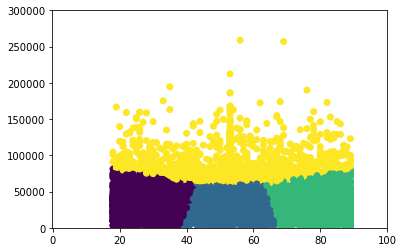

In [85]:
plt.scatter(x=df_KM_1['Age'], y=df_KM_1['Income'], c=df_KM_1['kmeans_4'])
plt.xlim(-0.1, 100)
plt.ylim(0, 300000)
plt.show()

In [86]:
for k in range(1,6):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(df_KM_1[['Age_K','Income_K']])
    df_KM_1[f'KMeans{k}'] = kmeans.labels_

In [87]:
df_KM_1

,Children,Age,Income,Outage_sec_perweek,Yearly_equip_failure,MonthlyCharge,Bandwidth_GB_Year,Timely_Response,Timely_Fixes,Timely_Replacement,...,Respect_Response_K,Court_Exchange_K,Evidence_Active_Listen_K,Sum_service_K,kmeans_4,KMeans1,KMeans2,KMeans3,KMeans4,KMeans5
0,1.0,68.0,28561.990000,6.972566,1,171.449762,904.536110,5,5,5,...,0.486389,-0.495406,0.490384,0.262095,2,0,1,1,3,0
1,1.0,27.0,21704.770000,12.014541,1,242.948015,800.982766,3,4,3,...,-0.481165,0.476931,0.490384,0.964386,0,0,0,0,2,2
2,4.0,50.0,39936.762226,10.245616,1,159.440398,2054.706961,4,4,2,...,-0.481165,-0.495406,-0.481828,-0.440196,1,0,0,0,0,3
3,1.0,48.0,18925.230000,15.206193,0,120.249493,2164.579412,4,4,4,...,0.486389,-0.495406,-0.481828,-0.440196,1,0,0,0,0,4
4,0.0,83.0,40074.190000,8.960316,1,150.761216,271.493436,4,4,4,...,0.486389,0.476931,1.462596,-1.142487,2,0,1,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,3.0,53.0,55723.740000,9.265392,0,159.828800,6511.253000,3,2,3,...,-0.481165,-1.467742,-0.481828,-0.440196,1,0,1,0,0,3
9996,4.0,48.0,39936.762226,8.115849,0,208.856400,5695.952000,4,5,5,...,1.453943,-1.467742,1.462596,0.964386,1,0,0,0,0,3
9997,1.0,53.0,39936.762226,4.837696,0,168.220900,4159.306000,4,4,4,...,0.486389,0.476931,1.462596,0.262095,1,0,0,0,0,3
9998,1.0,39.0,16667.580000,12.076460,0,252.628600,6468.457000,4,4,6,...,-0.481165,1.449268,0.490384,0.262095,0,0,0,0,2,4


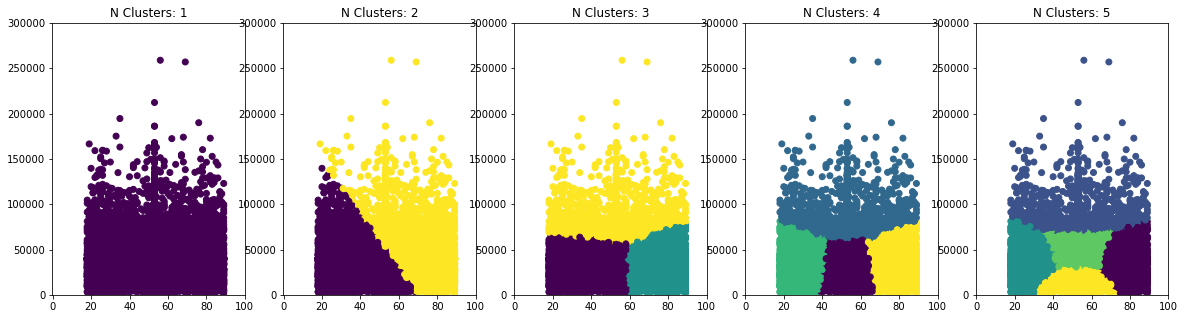

In [88]:
fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(20,5))

for i, ax in enumerate(fig.axes, start=1):
    ax.scatter(x=df_KM_1['Age'], y=df_KM_1['Income'], c=df_KM_1[f'KMeans{i}'])
    ax.set_ylim(0, 300000)
    ax.set_xlim(-0.1, 100)
    ax.set_title(f'N Clusters: {i}')

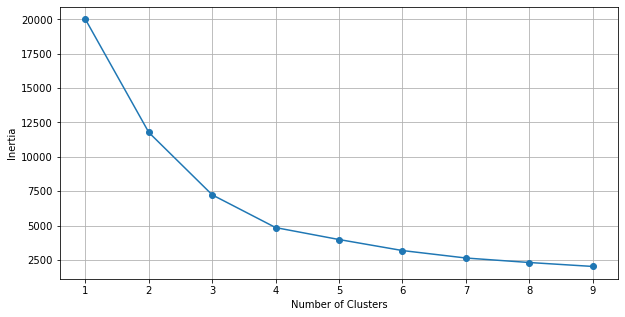

In [89]:
df_KM_2 = df_final.copy() 
optimise_k_means(df_KM_2[['MonthlyCharge_K','Band_GB_Year_K']], 10)

In [90]:
km_2 = KMeans(n_clusters=3)
km_fit_2 = km_2.fit(df_KM_2[['MonthlyCharge_K','Band_GB_Year_K']])
df_KM_2['kmeans_3'] = km_fit_2.labels_
df_KM_2

,Children,Age,Income,Outage_sec_perweek,Yearly_equip_failure,MonthlyCharge,Bandwidth_GB_Year,Timely_Response,Timely_Fixes,Timely_Replacement,...,Time_Resp_K,Time_Fix_K,Time_replace_K,Reliability_K,Options_K,Respect_Response_K,Court_Exchange_K,Evidence_Active_Listen_K,Sum_service_K,kmeans_3
0,1.0,68.0,28561.990000,6.972566,1,171.449762,904.536110,5,5,5,...,1.454307,1.444922,1.471896,-0.485004,0.494844,0.486389,-0.495406,0.490384,0.262095,2
1,1.0,27.0,21704.770000,12.014541,1,242.948015,800.982766,3,4,3,...,-0.472948,0.478354,-0.473770,-0.485004,0.494844,-0.481165,0.476931,0.490384,0.964386,1
2,4.0,50.0,39936.762226,10.245616,1,159.440398,2054.706961,4,4,2,...,0.490679,0.478354,-1.446603,0.489878,0.494844,-0.481165,-0.495406,-0.481828,-0.440196,2
3,1.0,48.0,18925.230000,15.206193,0,120.249493,2164.579412,4,4,4,...,0.490679,0.478354,0.499063,-1.459886,1.470674,0.486389,-0.495406,-0.481828,-0.440196,2
4,0.0,83.0,40074.190000,8.960316,1,150.761216,271.493436,4,4,4,...,0.490679,0.478354,0.499063,-0.485004,0.494844,0.486389,0.476931,1.462596,-1.142487,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,3.0,53.0,55723.740000,9.265392,0,159.828800,6511.253000,3,2,3,...,-0.472948,-1.454781,-0.473770,-0.485004,0.494844,-0.481165,-1.467742,-0.481828,-0.440196,0
9996,4.0,48.0,39936.762226,8.115849,0,208.856400,5695.952000,4,5,5,...,0.490679,1.444922,1.471896,0.489878,0.494844,1.453943,-1.467742,1.462596,0.964386,1
9997,1.0,53.0,39936.762226,4.837696,0,168.220900,4159.306000,4,4,4,...,0.490679,0.478354,0.499063,0.489878,0.494844,0.486389,0.476931,1.462596,0.262095,0
9998,1.0,39.0,16667.580000,12.076460,0,252.628600,6468.457000,4,4,6,...,0.490679,0.478354,2.444730,0.489878,-0.480987,-0.481165,1.449268,0.490384,0.262095,1


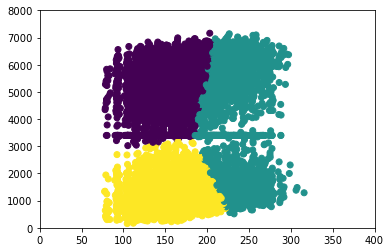

In [91]:
plt.scatter(x=df_KM_2['MonthlyCharge'], y=df_KM_2['Bandwidth_GB_Year'], c=df_KM_2['kmeans_3'])
plt.xlim(-0.1,400)
plt.ylim(0, 8000)
plt.show()

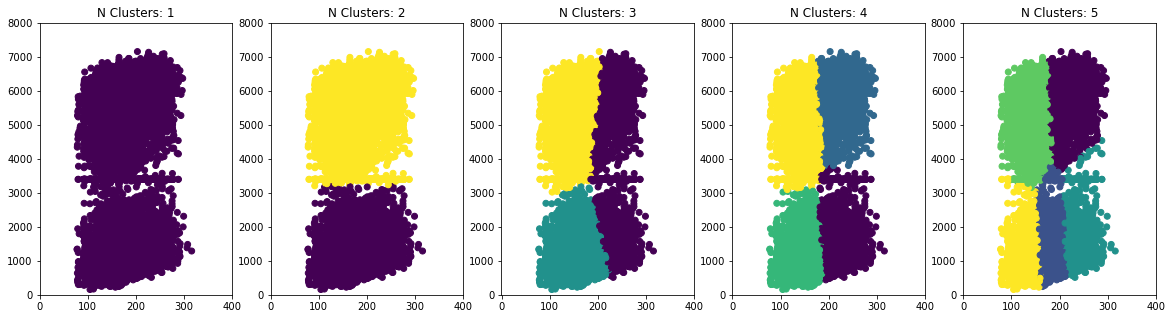

In [92]:
for k in range(1,6):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(df_KM_2[['MonthlyCharge_K','Band_GB_Year_K']])
    df_KM_2[f'KMeans{k}'] = kmeans.labels_
    
fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(20,5))

for i, ax in enumerate(fig.axes, start=1):
    ax.scatter(x=df_KM_2['MonthlyCharge'], y=df_KM_2['Bandwidth_GB_Year'], c=df_KM_2[f'KMeans{i}'])
    
    ax.set_ylim(0, 8000)
    ax.set_xlim(-0.1, 400)
    ax.set_title(f'N Clusters: {i}')

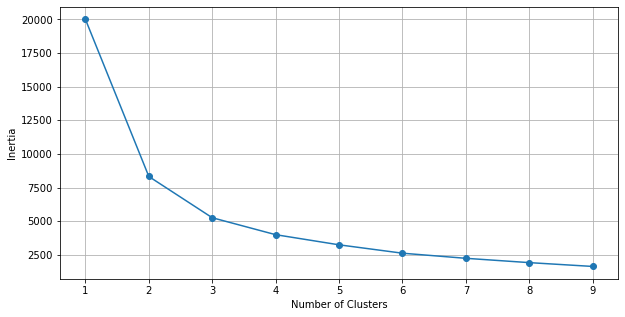

In [93]:
df_KM_3 = df_final.copy() 
optimise_k_means(df_KM_3[['MonthlyCharge_K','Sum_service_K']], 10)

In [94]:
km_3 = KMeans(n_clusters=3)
km_fit_3 = km_3.fit(df_KM_3[['MonthlyCharge_K','Sum_service_K']])
df_KM_3['kmeans_3'] = km_fit_3.labels_
df_KM_3

,Children,Age,Income,Outage_sec_perweek,Yearly_equip_failure,MonthlyCharge,Bandwidth_GB_Year,Timely_Response,Timely_Fixes,Timely_Replacement,...,Time_Resp_K,Time_Fix_K,Time_replace_K,Reliability_K,Options_K,Respect_Response_K,Court_Exchange_K,Evidence_Active_Listen_K,Sum_service_K,kmeans_3
0,1.0,68.0,28561.990000,6.972566,1,171.449762,904.536110,5,5,5,...,1.454307,1.444922,1.471896,-0.485004,0.494844,0.486389,-0.495406,0.490384,0.262095,0
1,1.0,27.0,21704.770000,12.014541,1,242.948015,800.982766,3,4,3,...,-0.472948,0.478354,-0.473770,-0.485004,0.494844,-0.481165,0.476931,0.490384,0.964386,2
2,4.0,50.0,39936.762226,10.245616,1,159.440398,2054.706961,4,4,2,...,0.490679,0.478354,-1.446603,0.489878,0.494844,-0.481165,-0.495406,-0.481828,-0.440196,0
3,1.0,48.0,18925.230000,15.206193,0,120.249493,2164.579412,4,4,4,...,0.490679,0.478354,0.499063,-1.459886,1.470674,0.486389,-0.495406,-0.481828,-0.440196,1
4,0.0,83.0,40074.190000,8.960316,1,150.761216,271.493436,4,4,4,...,0.490679,0.478354,0.499063,-0.485004,0.494844,0.486389,0.476931,1.462596,-1.142487,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,3.0,53.0,55723.740000,9.265392,0,159.828800,6511.253000,3,2,3,...,-0.472948,-1.454781,-0.473770,-0.485004,0.494844,-0.481165,-1.467742,-0.481828,-0.440196,0
9996,4.0,48.0,39936.762226,8.115849,0,208.856400,5695.952000,4,5,5,...,0.490679,1.444922,1.471896,0.489878,0.494844,1.453943,-1.467742,1.462596,0.964386,2
9997,1.0,53.0,39936.762226,4.837696,0,168.220900,4159.306000,4,4,4,...,0.490679,0.478354,0.499063,0.489878,0.494844,0.486389,0.476931,1.462596,0.262095,0
9998,1.0,39.0,16667.580000,12.076460,0,252.628600,6468.457000,4,4,6,...,0.490679,0.478354,2.444730,0.489878,-0.480987,-0.481165,1.449268,0.490384,0.262095,2


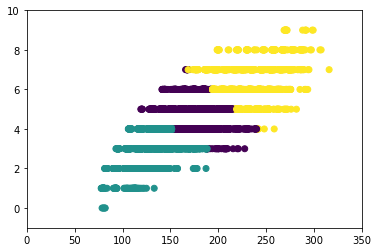

In [95]:
plt.scatter(x=df_KM_3['MonthlyCharge'], y=df_KM_3['Sum_services'], c=df_KM_3['kmeans_3'])
plt.xlim(-0.1,350)
plt.ylim(-1, 10)
plt.show()

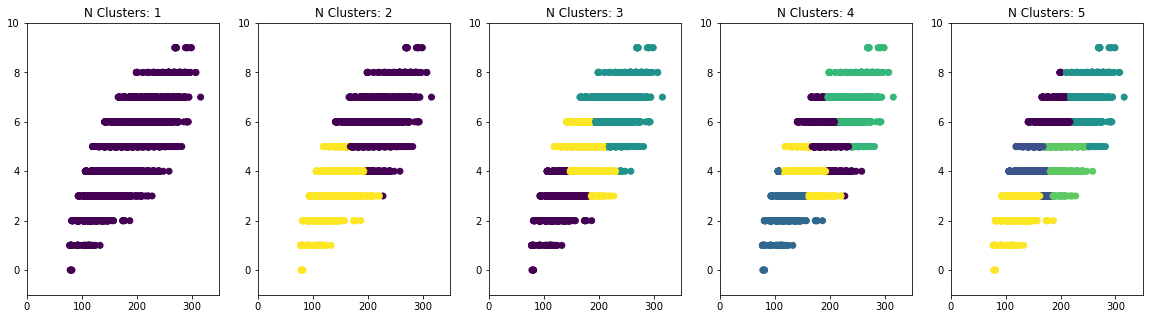

In [96]:
for k in range(1,6):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(df_KM_3[['MonthlyCharge_K','Sum_service_K']])
    df_KM_3[f'KMeans{k}'] = kmeans.labels_
    
fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(20,5))

for i, ax in enumerate(fig.axes, start=1):
    ax.scatter(x=df_KM_3['MonthlyCharge'], y=df_KM_3['Sum_services'], c=df_KM_3[f'KMeans{i}'])
    ax.set_ylim(-1, 10)
    ax.set_xlim(-0.1, 350)
    ax.set_title(f'N Clusters: {i}')